**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

**Loading the Data**

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

In [6]:
x_train.ndim, x_test.ndim

(3, 3)

**Changing Dimensionality**

In [7]:
x_train  = np.expand_dims(x_train,-1)
x_test  = np.expand_dims(x_test,-1)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

**Feature Scaling**

In [9]:
x_train = x_train/255
x_test = x_test/255

**Splitting data**

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val , y_train , y_val = train_test_split(x_train,y_train , test_size = 0.2 , random_state = 40)

**Creating model using CNN**

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

**Compile**

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

**Model Fitting**

In [14]:
model.fit(x_train,y_train,epochs = 30,batch_size = 512,verbose = 1, validation_data=(x_val,y_val))

Epoch 1/30
94/94 [==============================] - 36s 62ms/step - loss: 1.5525 - accuracy: 0.4126 - val_loss: 0.5762 - val_accuracy: 0.7783
Epoch 2/30
94/94 [==============================] - 5s 49ms/step - loss: 0.6298 - accuracy: 0.7624 - val_loss: 0.4506 - val_accuracy: 0.8352
Epoch 3/30
94/94 [==============================] - 5s 49ms/step - loss: 0.4955 - accuracy: 0.8199 - val_loss: 0.3824 - val_accuracy: 0.8562
Epoch 4/30
94/94 [==============================] - 5s 49ms/step - loss: 0.4331 - accuracy: 0.8432 - val_loss: 0.3399 - val_accuracy: 0.8737
Epoch 5/30
94/94 [==============================] - 5s 51ms/step - loss: 0.3858 - accuracy: 0.8591 - val_loss: 0.3268 - val_accuracy: 0.8777
Epoch 6/30
94/94 [==============================] - 5s 49ms/step - loss: 0.3597 - accuracy: 0.8691 - val_loss: 0.2928 - val_accuracy: 0.8921
Epoch 7/30
94/94 [==============================] - 5s 50ms/step - loss: 0.3335 - accuracy: 0.8792 - val_loss: 0.2804 - val_accuracy: 0.8965
Epoch 8/30
9

In [15]:
model.predict(np.expand_dims(x_test[0],axis = 0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
y_pred = model.predict(x_test).round(2)

**Evaluation**

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2136 - accuracy: 0.9235


[0.21359169483184814, 0.9235000014305115]

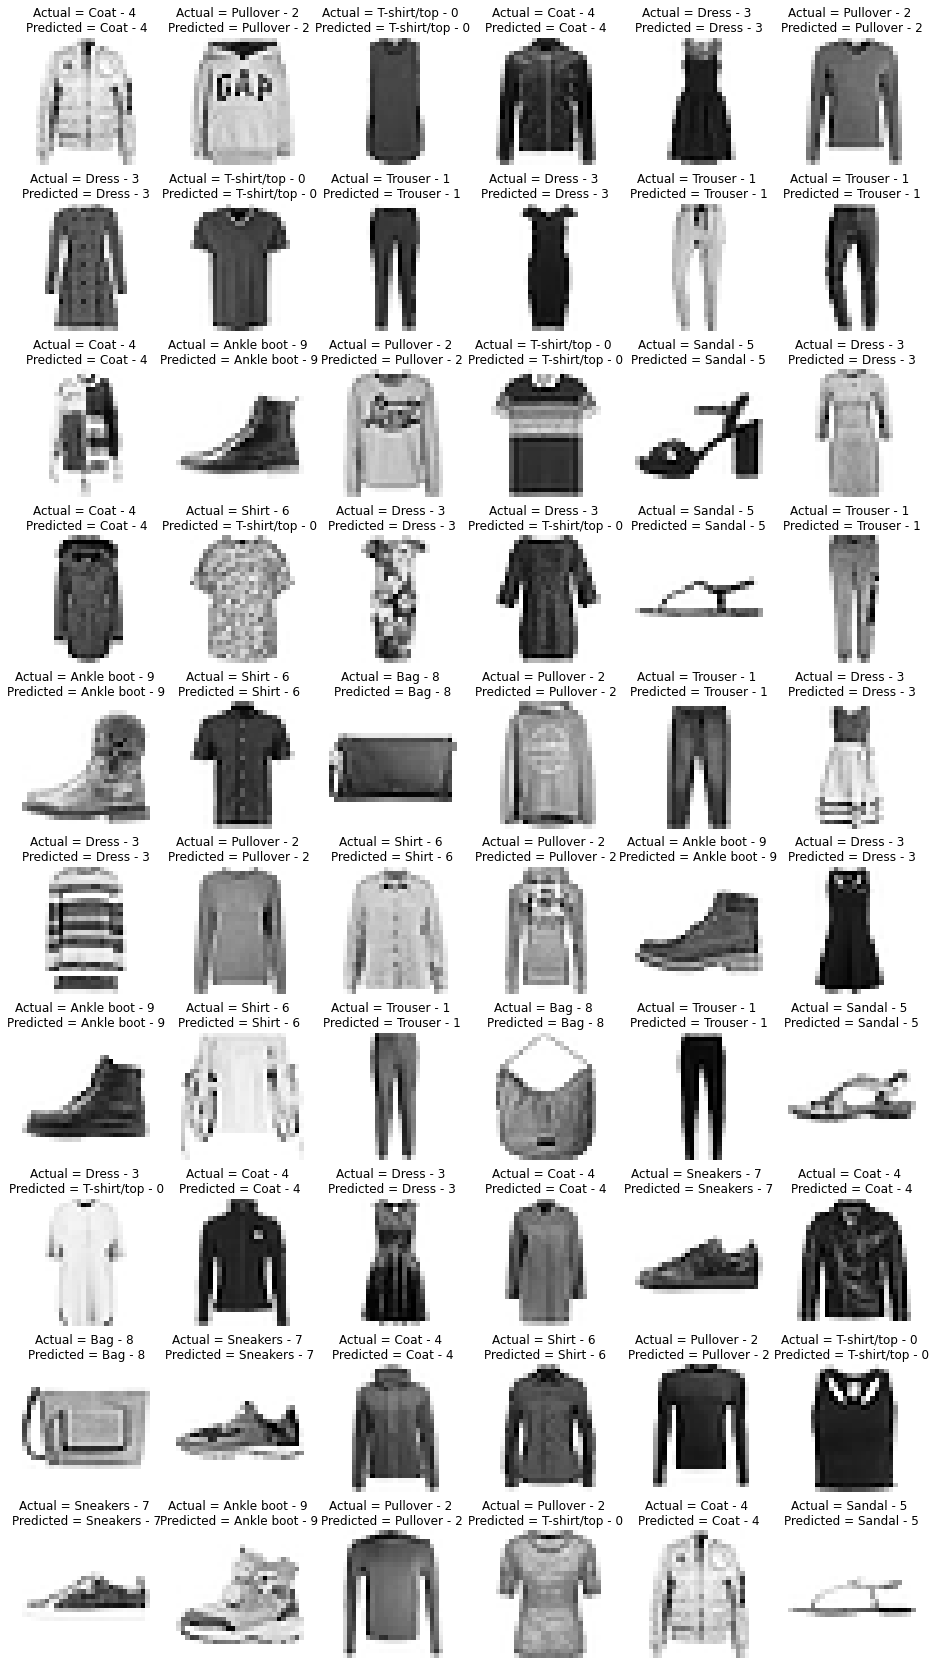

In [19]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} - {} \nPredicted = {} - {}'.format(labels[y_test[i]],y_test[i],labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))